In [1]:
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
import matplotlib.pyplot as plt
import os

fp = os.path.join('/', 
             'Users', 
             'jpcohen', 
             'EDS-220', 
             'eds220-hwk4', 
             'data', 
             'landsat8-2018-01-26-sb-simplified.nc')

In [2]:
landsat = rioxr.open_rasterio(fp)
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

# Preliminary Summary of the Landsat Data

The data has 3 dimensions. The first, is called 'band', and it refers to the number of bands in a `DataArray`. In this case it is only length 1, because the data only contains 1 band.

The other two dimensions are x and y, refering to longtitude and latitude. They have a length of 870 and 731 respectively, a unit of a meter, and a CRS of EPSG:32611.

Furthermore, the data has 5 variables: red, green, blue, nir08, and swir22, referring to red, green, blue, near infrared, and short wave infrared respectively. The respective wavelength ranges for each band (in nm) are 640-670, 530-590, 450-510, 850-880, and 2110-2290. 

The data otherwise has no attributes, but 3 indexes, one associated with each dimension.

In [3]:
landsat_bandless = (landsat
                    .squeeze()
                    .drop_vars('band'))

In [4]:
test = landsat_bandless[['red', 'green', 'blue']].to_array()#.isel(variable = 0, x = 50, y = 50)
test

<xarray.DataArray (variable: 3, y: 731, x: 870)> Size: 15MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
  * variable     (variable) object 24B 'red' 'green' 'blue'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


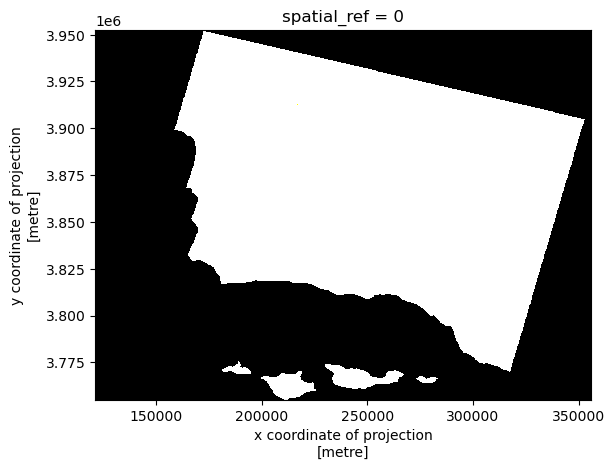

In [5]:
landsat_bandless[['red', 'green', 'blue']].to_array().plot.imshow()